In [1]:
import pandas as pd
fig=0
fin = open("../resources/report.tpl.md", "rt")
mdtext = fin.read()

def insertMdTable(dfin, name, mdtext, plot=False, transpose=False, maxcols=6, maxstr = 15):
    """
    *insertMdTable* inserts markdown tables formatting a numeric dataframe as
    markdown and inserting it amid the markdown text by replacing a tag that 
    concatenates the name argument with the ".table" string    

    Args: 
        dfin: numeric dataframe
        name: tag to replace (<name>.table)
        mdtext: markdown text
        plot: prints the table (default is False)
        transpose: transposes the table (default is False)
        maxcols: wraps the table in two or more rows if the number of columns 
                 exceeds maxcols (default is 10)
        maxstr: maximum size of strings, excess will be truncated
    Returns: markdown text
    """
    from IPython.display import Markdown as md
    import math
    import numpy as np

    def not_nbr(s):
        try:
            return not np.isfinite(float(s))
        except:
            return True

    nc = int(np.ceil(dfin.shape[int(not transpose)]/maxcols))
    dfin = dfin.reset_index()
    dfin = dfin.applymap(lambda x: str(x) if not_nbr(x) else (
                                   0 if float(x) == 0 else (
                                       int(x) if float(x) == int(x) else round(float(x), -int(math.floor(math.log10(abs(float(x))))) + 3)
                                   )
                                )
                         )

    # truncate strings
    dfin.columns = [str(i)[:maxstr-3]+'...' if len(str(i))>maxstr else str(i) for i in dfin.columns]
    dfin = dfin.applymap(lambda x: (str(x)[:maxstr-3]+'...' if len(str(x))>maxstr else str(x)) if not_nbr(x) else x)

    tmp_mdtxt = ""
    for i in range(nc):
        if transpose:  
            df = dfin.iloc[(i*maxcols):(min([(i+1)*maxcols,dfin.shape[1]])),:]
            if i<nc-1:
                df['...'] = ''
            table = df.T
            table.index.name = ' '
            table = table.reset_index()
            try:
                table = table.to_markdown(floatfmt="0.12g", index=False)
            except:
                from tabulate import tabulate
                table = tabulate(table, table.columns, floatfmt="0.12g", tablefmt='pipe', showindex=False)
        else:
            df = dfin.iloc[:,(i*maxcols):(min([(i+1)*maxcols,dfin.shape[1]]))]
            if i<nc-1:
                df['...'] = ''
            try:
                table = df.to_markdown(floatfmt="0.12g", index=False)
            except:
                from tabulate import tabulate
                table = tabulate(df, df.columns, floatfmt="0.12g", tablefmt='pipe', showindex=False)
            
            table = table+'\n'
        
        if i!=nc-1:
            tmp_mdtxt = tmp_mdtxt + table.replace("|\n","\n") + "\n\n"
        else:
            transp = "transposed " if transpose else ""
            tmp_mdtxt = "Table: "+transp+"sample from "+name+".csv file. \\label{table:"+name+"}\n\n" + tmp_mdtxt + table

    mdtext = mdtext.replace(name+'.table', tmp_mdtxt)
    
    if plot:
        print(tmp_mdtxt)

    return mdtext


World Development Indicators from https://databank.worldbank.org/source/world-development-indicators

In [2]:
wdi = pd.read_csv('../data/WDIData.csv')

# generate markdown file sample 
wdi_d = wdi[['Country Name','Country Code','Indicator Name','Indicator Code','1960']].head(10)
wdi_d['...']='...'
wdi_d = pd.concat([wdi_d,wdi[['2018']].head(10)],axis=1).set_index('Country Name')
mdtext = insertMdTable(wdi_d,'WDIData', mdtext,maxcols=7) 

display(wdi_d)
display(wdi.shape)

,Country Code,Indicator Name,Indicator Code,1960,...,2018
Country Name,,,,,,
Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,...,NaN
Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,...,89.286856
Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,...,79.248100
Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,...,97.063959
Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,...,NaN
Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,...,NaN
Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,...,NaN
Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,NaN,...,NaN
Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.40.ZS,NaN,...,NaN


(380160, 66)

Human Development Index from http://hdr.undp.org/en/data

In [3]:
hdi = pd.read_csv('../data/HDI.csv', na_values='..')

# generate markdown file sample 
hdi_d = hdi[['HDI Rank (2018)','Country','1990','1991']].head(10)
hdi_d['...']='...'
hdi_d = pd.concat([hdi_d,hdi[['2018']].head(10)],axis=1).set_index('HDI Rank (2018)')
mdtext = insertMdTable(hdi_d,'HDI', mdtext,maxcols=7) 

display(hdi_d)
display(hdi.shape)

,Country,1990,1991,...,2018
HDI Rank (2018),,,,,
170,Afghanistan,0.298,0.304,...,0.496
69,Albania,0.644,0.625,...,0.791
82,Algeria,0.578,0.582,...,0.759
36,Andorra,NaN,NaN,...,0.857
149,Angola,NaN,NaN,...,0.574
74,Antigua and Barbuda,NaN,NaN,...,0.776
48,Argentina,0.707,0.714,...,0.830
81,Armenia,0.633,0.629,...,0.760
6,Australia,0.866,0.867,...,0.938


(212, 31)

To join Human Development Index with World Development Indicators by Country Names, several country names had to be replaced to use the same convention in both data sets.  

In [4]:
to_repl = pd.read_csv('../data/to_repl.csv').values
hdi['Country Name'] = hdi.Country.replace(to_replace=to_repl[:,0],value=to_repl[:,1])

The goal of the study will be to explore patterns and explain changes in the Human Development Index - HDI - our *label* or *dependent* variable. Such changes are defined as the difference between the country HDI at a given year and the HDI three years later as follows: 
$$HDI_{\Delta}=HDI_{y+3} - HDI_{y}$$
As assumption, we considered the year to year changes less informative, instead, a three year change shall provide a more robust metric of whether a sustainable change is occuring as opposed to a one-off variation (*e.g.*: natural catastrophe, formula revisions, election year book cooking). Because the quality of political institutions can be questioned in many countries, the quality of the statistics and reporting provided is also often questionable, thus, focusing on the variation makes the overall data analysis less biased by inter country variability in the quality of statistics or political institutions.
The reason to exclude the first decade available in the HDI data set is grounded on the fact that many WDI metrics and countries had no reliable statistical reporting prior to the institution consolidation that followed the 1989 fall of Berlin Wall and the end of yugoslav civil war, so 1990 and 1995 HDI reporting were excluded.  

In [5]:
ys = [2000,2005,2010,2015]
yss = [str(i) for i in ys]
for y in ys:
    hdi[str(y)]=hdi[str(y+3)]-hdi[str(y)]
hdi['Indicator Name']='$HDI_{\Delta}$'
hdi = hdi[['Country Name','Indicator Name','2000','2005','2010','2015']]

The World Development Indicators, our *independent* or *explanatory* variables or *features*, were also preprocessed to include variations over the course of, in this case, 2 years ($WDI_{\Delta} = WDI_y - WDI_{y-2}$), the hipothesis is that the increasing or decreasing trend can contribute as predictor for the label variable. Notice also that the labels associated the World Development Indicators at a given year ($HDI_y$), are caculated as the difference between the HDI three years into the future and the HDI at the given year ($HDI_{\Delta}=HDI_{y+3} - HDI_{y}$).
Taking all into account, a 5 year period is contributing to every given sample and thus, to maximize sample independence, we are not overlapping periods in the process of producing the samples out of the WDI and HDI data sets, instead, we will build one sample for each country every five years (since 1998 up to 2018).
Moreover, the Human Development Index is a derived metric that uses variables in the WDI data set, thus, avoinding time overlaps and predicting the deltas is what prevents us from going in the direction of less interesting conclusions such as finding the HDI formula (a reverse-engineering task).  

In [6]:
past = [i for l in [[str(y-2),str(y-1)] for y in ys] for i in l]
wdi = wdi[['Country Name','Indicator Name']+yss+past]
for y in ys:
    wdi[str(y)] = wdi[[str(y-2),str(y-1),str(y)]].mean(skipna=True, axis=1)

wdid = wdi.copy()
for y in ys:
    wdid[str(y)] =(wdi[str(y)]-wdi[str(y-2)])
wdid['Indicator Name'] = wdid['Indicator Name'] + ' - Delta'

wdi.drop(past,inplace=True, axis=1)
wdid.drop(past,inplace=True, axis=1)

Both datasets have several country aggregates derived from countries already represented in the data set (dependent samples). For that reason we discarded aggregates from both data sets. Aggregates such as "East Asia and the Pacific", "Europe and Central Asia", "Latin America and the Caribbean", "South Asia", "Sub-Saharan Africa" or "Least Developed Countries".

In [7]:
hdi = hdi.set_index('Country Name').drop(['Human Development',
                                          'Very high human development', 'High human development',
                                          'Medium human development', 'Low human development',
                                          'Developing Countries', 'Regions', 'Arab World',
                                          'East Asia and the Pacific', 'Europe and Central Asia',
                                          'Latin America and the Caribbean', 'South Asia',
                                          'Sub-Saharan Africa', 'Least Developed Countries',
                                          'Small Island Developing States',
                                          'Organization for Economic Co-operation and Development', 'World'], 
                                         axis=0).reset_index().dropna(subset=yss, axis=0)
wdi = wdi[wdi['Country Name'].isin(hdi['Country Name'].values)]
wdid = wdid[wdid['Country Name'].isin(hdi['Country Name'].values)]

There is a need to unpivot the data sets from wide to long format before concatenating all data along the rows.

In [8]:
hdi = pd.melt(hdi, id_vars=['Country Name','Indicator Name'], value_vars=yss)
wdi = pd.melt(wdi, id_vars=['Country Name','Indicator Name'], value_vars=yss)
wdid = pd.melt(wdid, id_vars=['Country Name','Indicator Name'], value_vars=yss)

In [9]:
dset = pd.concat([hdi,wdi,wdid])
dset = dset.dropna(subset=['value'], axis=0)
dset['Country - Year'] = dset['Country Name'] + ' - ' + dset['variable']
dset = dset.drop(['Country Name','variable'], axis=1)

Finally, all variables can become represented as columns by pivoting the concatenated rows. The result is a conventional tabular data set still quite populated with nulls. 

In [10]:
dset = dset.reset_index(drop=True).pivot(columns=['Indicator Name'],
                                         index='Country - Year', 
                                         values='value')

As a first step to avoid empty values in the variables, we will find the list of metrics that have higher number of empty values, usually meaning that such metric is only available for few countries or for very recent years.
We will rank the metrics from the one with the most empty values (close to 691 - \ref{fig1}) down to the one with the least empty values (0 - \ref{fig1}) and visually identify an elbow that would help us decide for a reasonable number of empty values to tolerate in our selection of varibles to include in the data set.  

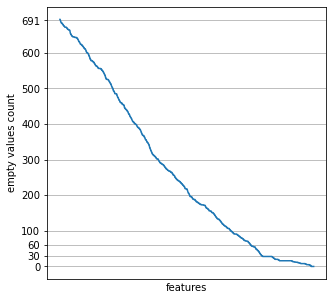

In [11]:
cna = dset.isna().sum().sort_values(ascending=False)
ax = cna.plot(figsize=(5,5), 
                 grid=True, 
                 xlabel="features", 
                 ylabel="empty values count",
                 xticks=[],
                 yticks=[691,600,500,400,300,200,100,60,30,0])
fig += 1
f = ax.get_figure()
f.savefig('../resources/fig'+str(fig)+".png")

There is an elbow below 60 empty values (\ref{fig1}) thus, for a range between 0 and 60 empty values, we will perform a detailed inspection of the balance between the chosen number of features and the number of samples that will remain after discarding samples having one or more empty values.

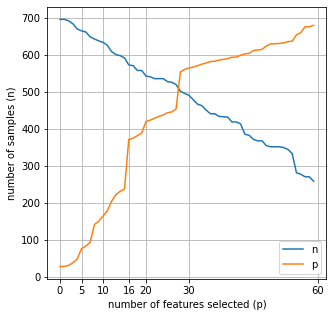

In [12]:
sdf = pd.DataFrame(columns=['n','p','na_to_drop_var'])
for i in range(1,61):
    sr = pd.Series(list(dset[cna[cna<i].index].dropna(how='any', axis=0).shape)+[i], index = sdf.columns)
    sdf = sdf.append(sr, ignore_index=True)  
ax = sdf[['n','p']].plot(figsize=(5,5), 
                                         grid=True, 
                                         xlabel="number of features selected (p)", 
                                         ylabel="number of samples (n)",
                                         xticks=[0,5,10,16,20,30,60])
fig += 1
f = ax.get_figure()
f.savefig('../resources/fig'+str(fig)+".png")

The result is the chart from figure \ref{fig2}. There we can observe that we wish to have more features our decision shall move towards tolerating 30 empty values, as already observed in figure \ref{fig1}. On the other hand, if we want to maximize the number of independent samples, then our decision shall approximate 16 empty values. Once our concern was more in the direction of maximizing the number of independet samples (already scarce from the start), we decided to tolerate 16 empty values.

In [13]:
dset = dset[cna[cna<=16].index]
dset = dset.dropna(how='any', axis=0).dropna(how='any', axis=1)
dset.columns = dset.columns.values

# sorting columns : label last
dset = dset[list(set(dset.columns)-set(['$HDI_{\Delta}$'])) + ['$HDI_{\Delta}$']]
# to csv
dset.to_csv('../data/WDI.csv')

dset_d = dset.iloc[:10,:3]
dset_d['...']='...'
dset_d = pd.concat([dset_d,dset[['$HDI_{\Delta}$']].head(10)],axis=1)
mdtext = insertMdTable(dset_d,'WDI', mdtext, maxcols=7) 

display(dset_d)
display(dset.shape)

,"Population ages 15-64, female (% of female population)","Merchandise imports by the reporting economy, residual (% of total merchandise imports)","Population ages 40-44, female (% of female population)",...,$HDI_{\Delta}$
Country - Year,,,,,
Afghanistan - 2015,51.502065,40.361607,3.830763,...,0.006
Albania - 2000,62.566526,0.399839,6.540066,...,0.020
Albania - 2005,65.075597,0.449250,7.335988,...,0.022
Albania - 2010,67.429475,0.078443,6.934936,...,0.041
Albania - 2015,68.785771,0.397006,6.591466,...,0.003
Algeria - 2000,60.390645,0.115899,4.915911,...,0.030
Algeria - 2005,65.107765,0.595468,5.550004,...,0.017
Algeria - 2010,67.224298,0.470022,5.948181,...,0.016
Algeria - 2015,66.006093,0.020237,6.200448,...,0.008


(573, 372)

In [14]:
fin.close()
fin = open("../README.md", "wt")
fin.write(mdtext)
fin.close()

In [15]:
!pandoc -s "../README.md" -t latex -o "../report.pdf"  --resource-path=..\ --filter pandoc-citeproc --bibliography=..\references\library.bib --csl=..\csl\iso690-author-date-en.csl

pdflatex: security risk: running with elevated privileges
pdflatex: security risk: running with elevated privileges
